# <center> Post-Processing: Plotting Results

Copyright (C) 2014-2019 The BET Development Team

This notebook demonstrates how to visualize the spaces involved in the stochastic inverse problem.
We leverage some Jupyter `%magics` to load in data files using `%store -r` to recover `bet.sample.discretization` objects from other Example Notebooks.

In [1]:
import bet.postProcess.plotP as plotP
import bet.postProcess.plotDomains as plotD
from IPython.display import Image
import glob

## Create Data (optional)

If you have not run a notebook, you can do so directly from the cell below: 

In [2]:
folders = glob.glob('*/')
folders.remove('matfiles/')
print('Pick an Example')
for idx, f in enumerate(folders):
    print('%2d. %s'%(idx,f[:-1] ))

Pick an Example
 0. FEniCS
 1. contaminantTransport
 2. figs
 3. sensitivity
 4. linearMap
 5. fromFile_ADCIRCMap
 6. nonlinearMap_estimate_error
 7. parallel_and_serial_sampling
 8. nonlinearMap
 9. validationExample


In [3]:
############ MAKE SELECTION ############
user_selection = 4 # done: 4, 9 ... need to check 3.
########################################
folder = folders[user_selection]
notebook_files = glob.glob('%s/*.ipynb'%folder)
print("You have selected %s. The files inside are\n"%folder, *notebook_files)

You have selected linearMap/. The files inside are
 linearMap/linearMapUniformSampling.ipynb


In [4]:
for notebook in notebook_files:
    example_filename = notebook[:-6] # strip file-ending
    !jupyter nbconvert --ExecutePreprocessor.timeout=-1 --to notebook --execute $example_filename'.ipynb'
    !rm $example_filename'.nbconvert.ipynb'
print("Finished running file and cleaning up.")

[NbConvertApp] Converting notebook linearMap/linearMapUniformSampling.ipynb to notebook
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] Writing 8516 bytes to linearMap/linearMapUniformSampling.nbconvert.ipynb
Finished running file and cleaning up.


# Load Data

In [5]:
%store -r my_discretization

In [6]:
input_samples = my_discretization.get_input_sample_set()
output_samples = my_discretization.get_output_sample_set()


## Suggested Changes
The example notebooks have been formatted to store data at the end of their runs in the local Jupyter namespace but delete all associated data files. If you want to load this data with `np.load`, you are welcome to comment out the last cell in the example files and load the data from `.mat` files. 

At this point, the only thing that should change in the `plotP.*` inputs
should be either the nbins values or sigma (which influences the kernel
density estimation with smaller values implying a density estimate that
looks more like a histogram and larger values smoothing out the values
more).

There are ways to determine "optimal" smoothing parameters (e.g., see `CV`, `GCV`,
and other similar methods), but we have not incorporated these into the code
as lower-dimensional marginal plots generally have limited value in understanding
the structure of a high dimensional non-parametric probability measure.

## 2D Plots

In [7]:
'This problem maps a ' + str(input_samples.get_dim()) + ' dimensional space to a ' + str(output_samples.get_dim()) + ' dimensional space.'

'This problem maps a 3 dimensional space to a 2 dimensional space.'

## Input Space

In [8]:
input_bins_per_dim = [10 for _ in range(input_samples.get_dim())]

try:
    # Show some plots of the different sample sets
    plotD.scatter_2D(input_samples,
                    filename = 'Parameter_Samples', img_folder=folder,
                    file_extension = '.png')

    # calculate 2d marginal probs
    (bins, marginals2D) = plotP.calculate_2D_marginal_probs(input_samples,
                    img_folder=folder, nbins = input_bins_per_dim)

    # plot 2d marginals probs
    plotP.plot_2D_marginal_probs(marginals2D, bins, input_samples, 
                    filename = '%s_raw'%(folder[:-1]),
                    file_extension = '.png', plot_surface=False)

    # smooth 2d marginals probs (optional)
    marginals2D = plotP.smooth_marginals_2D(marginals2D, bins, sigma=0.1)

    # plot 2d marginals probs
    plotP.plot_2D_marginal_probs(marginals2D, bins, input_samples, 
                    filename = '%s_smooth'%(folder[:-1]), 
                    file_extension = '.png', plot_surface=False)

except:
    print("Higher than 2D detected. Using `multi` mode.")
    %store -r param_ref
    plotD.scatter_2D_multi(input_samples, ref_sample=param_ref, showdim = 'all',
                    filename = 'Parameter_Samples', img_folder=folder,
                    file_extension = '.png')
    
    # calculate 2d marginal probs
    (bins, marginals2D) = plotP.calculate_2D_marginal_probs(input_samples,
                    nbins = input_bins_per_dim)

    # smooth 2d marginals probs (optional)
    marginals2D = plotP.smooth_marginals_2D(marginals2D, bins, sigma=0.2)

    # plot 2d marginals probs
    plotP.plot_2D_marginal_probs(marginals2D, bins, input_samples, 
                    filename = "%slinearMap"%(folder),
                    lam_ref=param_ref, file_extension = ".png", plot_surface=False)

print("Input space plotting completed. You can now view your images.")

Higher than 2D detected. Using `multi` mode.
Input space plotting completed. You can now view your images.


### Parameter Samples

linearMap/Parameter_Samples_d2_d3.png


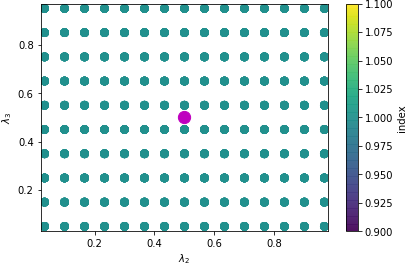

linearMap/Parameter_Samples_d1_d3.png


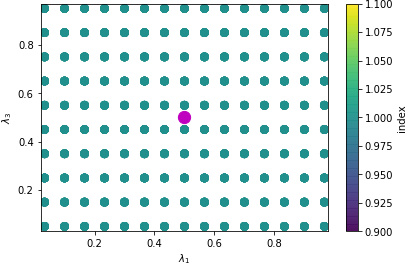

linearMap/Parameter_Samples_d1_d2.png


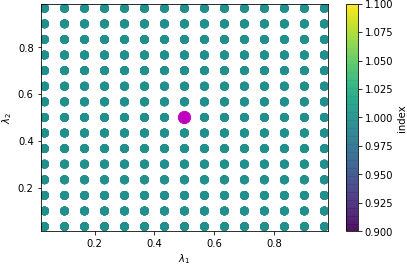

In [9]:
# display(Image('%sParameter_Samples.png'%folder))
for f in glob.glob('%sParameter_Samples*.png'%(folder)):
        print(f)
        display(Image(f))

## Output Samples

In [10]:
output_bins_per_dim = [10 for _ in range(output_samples.get_dim())]

try:
    plotD.scatter_2D(my_discretization._output_sample_set,
                    filename = '%sQoI_Samples'%(folder),
                    file_extension = '.png')

    plotD.scatter_2D(my_discretization._output_probability_set,
                    filename = '%sData_Space_Discretization'%(folder),
                    file_extension = '.png')

except:
    %store -r Q_ref
    print("Higher than 2D detected. Using `multi` mode.")
    plotD.scatter_2D_multi(output_samples, ref_sample=param_ref, showdim = 'all',
                    filename = 'QoI_Samples', img_folder=folder,
                    file_extension = '.png')
    
    plotD.show_data_domain_multi(my_discretization, Q_ref=Q_ref,
                    img_folder=folder, file_extension='.png')

print("Output space plotting completed. You can now view your images.")

Output space plotting completed. You can now view your images.


### QoI Samples

linearMap/QoI_Samples.png


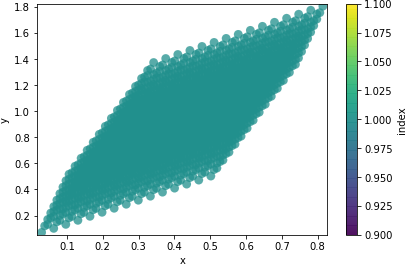

In [11]:
for f in glob.glob('%s/QoI_Samples*.png'%(folder)):
    print(f)
    display(Image(f))

for f in glob.glob('%s/q*domain*.png'%(folder)):
    print(f)
    display(Image(f))
    
## plot without reference data parameter:
# for f in glob.glob('%s/domain*.png'%(folder)):
#         print(f)
#         display(Image(f))

## Data Space

linearMap/Data_Space_Discretization.png


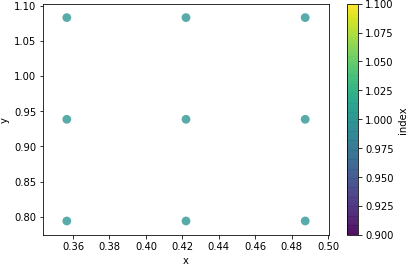

In [12]:
for f in glob.glob('%sData_Space_Discretization*'%(folder)):
    print(f)
    display(Image(f))

# Solution to Stochastic Inverse Problem

linearMap/linearMap_2D_0_1.png


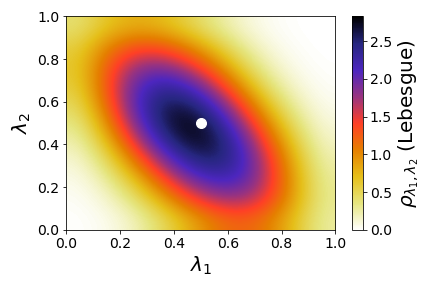

linearMap/linearMap_2D_0_2.png


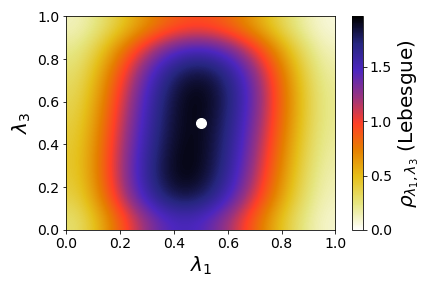

linearMap/linearMap_2D_1_2.png


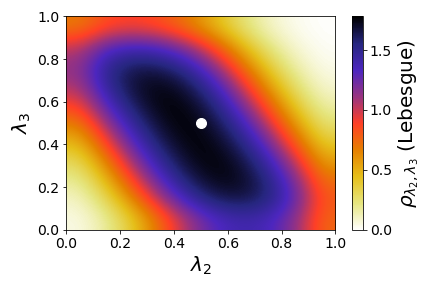

In [13]:
for f in glob.glob('%s*2D*'%(folder)):
    print(f)
    display(Image(f))

## 1D Plots

In [14]:
# calculate 1d marginal probs
(bins, marginals1D) = plotP.calculate_1D_marginal_probs(input_samples,
                                                        nbins = input_bins_per_dim)

# plot 1d marginal probs
plotP.plot_1D_marginal_probs(marginals1D, bins, input_samples,
                             filename = '%s%s_raw'%(folder, folder[:-1]),
                             file_extension = '.png')

# smooth 1d marginal probs (optional)
marginals1D = plotP.smooth_marginals_1D(marginals1D, bins, sigma=0.1)

# plot 2d marginal probs
plotP.plot_1D_marginal_probs(marginals1D, bins, input_samples,
                             filename = '%s%s_smooth'%(folder, folder[:-1]),
                             file_extension = '.png')

<Figure size 432x288 with 0 Axes>

## Raw 1D Marginals

linearMap/linearMap_raw_1D_2.png


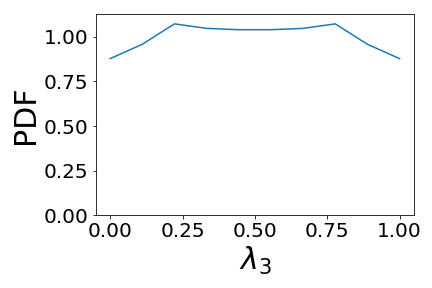

linearMap/linearMap_raw_1D_1.png


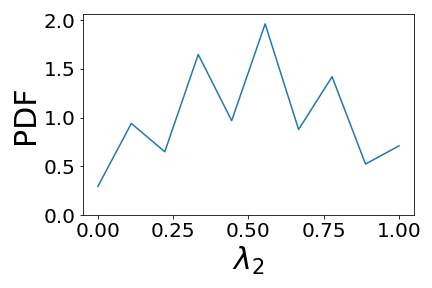

linearMap/linearMap_raw_1D_0.png


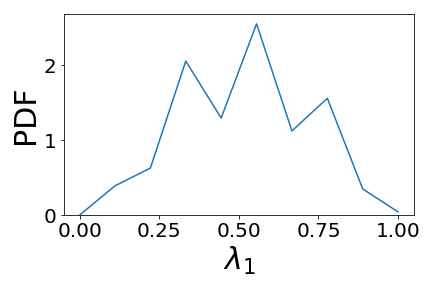

In [15]:
for f in glob.glob('%s%s_raw_1D*'%(folder, folder[:-1])):
    print(f)
    display(Image(f))

## Smoothed 1D Marginals

linearMap/linearMap_smooth_1D_2.png


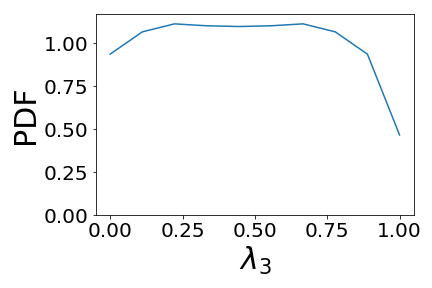

linearMap/linearMap_smooth_1D_1.png


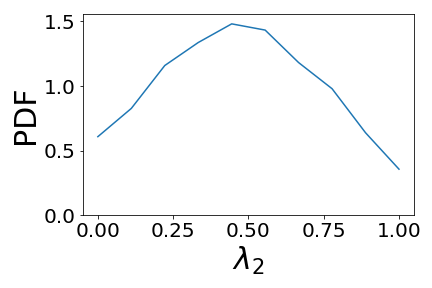

linearMap/linearMap_smooth_1D_0.png


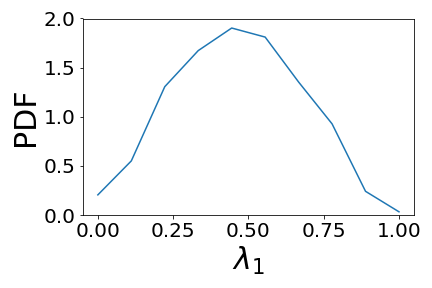

In [16]:
for f in glob.glob('%s%s_smooth_1D*'%(folder, folder[:-1])):
    print(f)
    display(Image(f))

# Remove all Files (optional)

In [17]:
!rm $folder*.png